In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
df= pd.read_csv('df_base')

In [25]:
df= df.drop(columns=['poster_path', 'original_language','homepage', 'imdb_id', 'original_title', 'overview', 'status', 'Keywords', 'tagline', 'cast', 'crew', 'production_companies', 'production_countries', 'spoken_languages'])

In [26]:
df= df.drop(columns=['Unnamed: 0'])

In [27]:
df.head(1)

,id,belongs_to_collection,budget,genres,popularity,release_date,runtime,title,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,Hot Tub Time Machine 2,12314651


In [28]:
#Adjust belongs to collection, create features and target (profitable y/n)
df= df.fillna(0)

In [29]:
df.isnull().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
popularity               0
release_date             0
runtime                  0
title                    0
revenue                  0
dtype: int64

In [30]:
#create a feature that is gross profit pct_profit
df['gross_profit']= df['revenue']- df['budget']

In [31]:
#Will drop all movies with no budget listed
df = df[df.budget != 0]

In [32]:
#Creating a pct profit column
df['pct_profit']= (df['gross_profit']/df['revenue']*100).round(2)

In [33]:
df.head(1)

,id,belongs_to_collection,budget,genres,popularity,release_date,runtime,title,revenue,gross_profit,pct_profit
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,Hot Tub Time Machine 2,12314651,-1685349,-13.69


In [34]:
# create date related features
df.release_date = pd.to_datetime(df.release_date)
df['release_year'] = df.release_date.dt.year
df['release_year'] = df.release_year.apply(lambda x: x-100 if x > 2020 else x)

In [42]:
#All films that beloing to a collection (book, franchise, etc.) assigned a 1
df.belongs_to_collection.loc[df['belongs_to_collection']!=0]=1
        

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
df.round(decimals=2)
df.head()

,id,belongs_to_collection,budget,genres,popularity,release_date,runtime,title,revenue,gross_profit,pct_profit,release_year
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2015-02-20,93.0,Hot Tub Time Machine 2,12314651,-1685349,-13.69,2015
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,2004-08-06,113.0,The Princess Diaries 2: Royal Engagement,95149435,55149435,57.96,2004
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,2014-10-10,105.0,Whiplash,13092000,9792000,74.79,2014
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,2012-03-09,122.0,Kahaani,16000000,14800000,92.50,2012
5,6,0,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.743274,1987-08-06,83.0,Pinocchio and the Emperor of the Night,3261638,-4738362,-145.28,1987


(array([  7.,  18.,  15.,  31.,  44.,  62., 190., 310., 677., 834.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <a list of 10 Patch objects>)

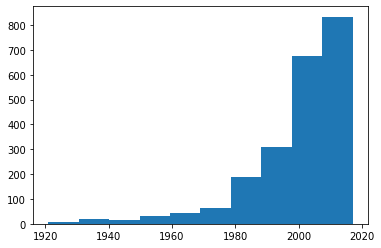

In [46]:
plt.hist(df['release_year'])

In [47]:
#grouped hrelease dates into time periods into 6 groups
release_time= {'release_time' : []}
for x in df['release_year']:
#     print(x)
    if x > 2010:
        release_time['release_time'].append('1')
    elif x>=2005:
        release_time['release_time'].append('2')
    elif x >=2000:
        release_time['release_time'].append('3')
    elif x >= 1995:
        release_time['release_time'].append('4')
    elif x >= 1990:
        release_time['release_time'].append('5')
    else:
        release_time['release_time'].append('6')

#df
df['release_time']= release_time['release_time']

In [48]:
df.head()

,id,belongs_to_collection,budget,genres,popularity,release_date,runtime,title,revenue,gross_profit,pct_profit,release_year,release_time
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2015-02-20,93.0,Hot Tub Time Machine 2,12314651,-1685349,-13.69,2015,1
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,2004-08-06,113.0,The Princess Diaries 2: Royal Engagement,95149435,55149435,57.96,2004,3
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,2014-10-10,105.0,Whiplash,13092000,9792000,74.79,2014,1
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,2012-03-09,122.0,Kahaani,16000000,14800000,92.50,2012,1
5,6,0,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.743274,1987-08-06,83.0,Pinocchio and the Emperor of the Night,3261638,-4738362,-145.28,1987,6


In [49]:
#will do Binary profitable yes/no, Threshold will be 25% profit
profitable= {'profitable' : []}
for x in df['pct_profit']:
    if x > .25:
        profitable['profitable'].append('1')
    else:
        profitable['profitable'].append('0')
df['profitable']= profitable['profitable']



In [51]:
df.to_csv('df2')

#### Exploration

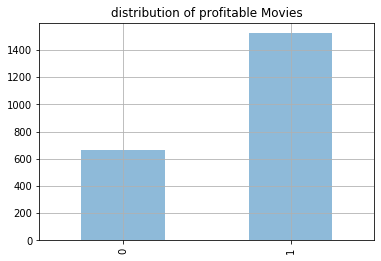

In [53]:
df.profitable.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("distribution of profitable Movies")
plt.grid(b = True , which = "major")